## Multi-Class Text Classification Using Deep Learning Algorithms

In [ ]:
# Author : Abir Rahali <abirrahali2016@gmail.com>
# Date   : 13-11-2023

In [1]:
# Dataframe Packages
import pandas as pd
import numpy as np

# Visalisation Packages
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns

# Text Processing Packages
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Warning
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
from sklearn.model_selection import train_test_split


# Deep Learning
from transformers import AutoTokenizer, TFAutoModel
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
TRAIN_DATA_PATH   = "data/medical_tc_train.csv"
TEST_DATA_PATH    = "data/medical_tc_test.csv"

TEXT_COLUMN_NAME  = "medical_abstract"
LABEL_COLUMN_NAME = "condition_label"
LABELS            = pd.read_csv("data/medical_tc_labels.csv")[LABEL_COLUMN_NAME]
num_classes = 5

# I. Data

In [3]:
print(f"Step 1/8 : Load the data files")

test_df = pd.read_csv(TEST_DATA_PATH)
train_df = pd.read_csv(TRAIN_DATA_PATH)

# Unique labels in data
print(train_df[LABEL_COLUMN_NAME].unique())
print(len(train_df[LABEL_COLUMN_NAME].unique()))

# Shape of data:
print(train_df.shape)
print(test_df.shape)

train_df.head()

Step 1/8 : Load the data files
[5 1 2 3 4]
5
(11550, 2)
(2888, 2)


,condition_label,medical_abstract
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...


In [6]:
# Data type change
train_df['text'] = train_df[TEXT_COLUMN_NAME].astype(str)
test_df['text'] = test_df[TEXT_COLUMN_NAME].astype(str)


# Remove rows with missing values
train_df.dropna(subset = ['text'], inplace = True)
test_df.dropna(subset = ['text'], inplace = True)


stop = stopwords.words('english')
porter = PorterStemmer()


def remove_punctuation(description):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)


train_df['text'] = train_df['text'].apply(remove_punctuation)
train_df['text'] = train_df['text'].apply(remove_stopwords)
train_df['text'] = train_df['text'].apply(stemmer)

test_df['text'] = test_df['text'].apply(remove_punctuation)
test_df['text'] = test_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(stemmer)


train_df['length'] = train_df['text'].apply(len)
test_df['length'] = test_df['text'].apply(len)

print(train_df['length'].unique().mean())
print(test_df['length'].unique().mean())

train_df.head()

922.5533333333333
848.916451335056


,condition_label,medical_abstract,text,length
0,5,Tissue changes around loose prostheses. A cani...,tissu chang around loos prosthes canin model i...,649
1,1,Neuropeptide Y and neuron-specific enolase lev...,neuropeptid neuronspecif enolas level benign m...,760
2,2,"Sexually transmitted diseases of the colon, re...",sexual transmit diseas colon rectum anu challe...,1141
3,1,Lipolytic factors associated with murine and h...,lipolyt factor associ murin human cancer cache...,687
4,3,Does carotid restenosis predict an increased r...,carotid restenosi predict increas risk late sy...,954


For deep learning models we need a validate set to teach the algorithm, so we split the train into train and validate

In [8]:
print("STEP : Split the train data to train and validate to be used in the deep learning models")
x_train, x_validate, y_train, y_validate = train_test_split(train_df['text'], train_df['condition_label'], test_size=0.1, random_state=42)

print("STEP : Define the test X & Y")
x_test = test_df['text']
y_test = test_df['condition_label']

STEP : Split the train data to train and validate to be used in the deep learning models
STEP : Define the test X & Y


In [9]:
print("STEP : Encode the Y (label) in train, validate & test sets")
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

y_validate = encoder.transform(y_validate)
y_validate = tf.keras.utils.to_categorical(y_validate, num_classes)

y_test = encoder.transform(y_test)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

STEP : Encode the Y (label) in train, validate & test sets


# II. Model

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Epoch 1/2
1300/1300 [==============================] - 11794s 9s/step - loss: 1.1828 - accuracy: 0.5120 - val_loss: 0.9477 - val_accuracy: 0.6035
Epoch 2/2
1300/1300 [==============================] - 10737s 8s/step - loss: 0.9479 - accuracy: 0.6139 - val_loss: 0.8790 - val_accuracy: 0.6382


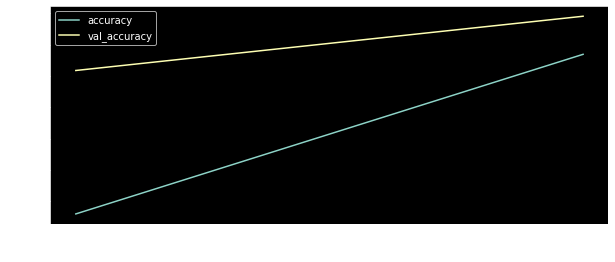

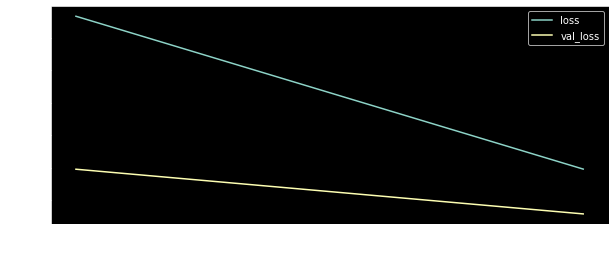

91/91 [==============================] - 892s 10s/step - loss: 0.8790 - accuracy: 0.6382
Test accuracy : 0.6381579041481018


In [10]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
bert = TFAutoModel.from_pretrained('distilbert-base-uncased')

for layer in bert.layers:
    layer.trainable = True

# Tokenization of the data
def text_encode(text, tokenizer, max_len=100):
    tokens = text.apply(lambda x: tokenizer(x,
                                            return_tensors = 'tf', 
                                            truncation = True,
                                            padding = 'max_length',
                                            max_length = max_len, 
                                            add_special_tokens = True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)

    return [input_ids,attention_mask]


# Model Creation
def build_model(bert_model, maxlen=100):
    input_ids = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='attention_mask')
    sequence_output = bert_model(input_ids,attention_mask=attention_mask)
    
    output = sequence_output[0][:,0,:]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(5,activation='softmax')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_mask], outputs = [output])
    model.compile(Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


# Transform the data
X_train_input_ids, X_train_attention_mask = text_encode(x_train, tokenizer, max_len=512)
X_validate_input_ids, X_validate_attention_mask = text_encode(x_test, tokenizer, max_len=512)

# Build the model
model = build_model(bert, maxlen=512)


history = model.fit(
    [X_train_input_ids, X_train_attention_mask],
    y_train,
    batch_size=8,
    validation_data=([X_validate_input_ids, X_validate_attention_mask], y_validate),
    epochs=2
)

# Plot the history of training
def plot_graphs(history, string):
    fig, ax = plt.subplots(figsize = (10, 4))
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Testing

In [11]:
X_test_input_ids, X_test_attention_mask = text_encode(x_test, tokenizer, max_len=512)
loss, accuracy = model.evaluate([X_test_input_ids, X_test_attention_mask], y_test)
print('Test accuracy :', accuracy)

91/91 [==============================] - 1009s 11s/step - loss: 0.8790 - accuracy: 0.6382
Test accuracy : 0.6381579041481018


# III. Conclusion

The application of RNN architectures, coupled with basic Keras tokenization, failed to yield significant improvements in predictive accuracy, given the limitations of low training epochs. However, a pivotal breakthrough emerged with the integration of DistilBERT fine-tuning, resulting in a notable accuracy increase to 63%. It is important to note that the reported success was achieved under constraints, with minimal investment in training epochs and no extensive hyperparameter tuning. This underscores the potential for further advancements with dedicated time and efforts towards more comprehensive model training and hyperparameter optimization in future iterations of this project.

**WHY ?** 

BERT (Bidirectional Encoder Representations from Transformers) outperforms traditional methods such as RNNs (Recurrent Neural Networks) and classical machine learning algorithms for text classification due to its unique architecture and pre-training strategy. Unlike traditional models that process text sequentially, BERT leverages the power of transformer architectures, allowing it to capture contextual information bidirectionally. This means that BERT considers both left and right context words when understanding the meaning of a word, resulting in a more nuanced and contextually aware representation. Furthermore, BERT is pre-trained on large corpora, learning rich contextualized representations of words in various contexts. This pre-training enables BERT to grasp semantic relationships, understand nuances, and capture the intricacies of language. Traditional models, including RNNs, struggle to capture long-range dependencies and may suffer from vanishing or exploding gradient problems during training. The attention mechanism in BERT allows it to assign different weights to different parts of the input sequence, focusing on the most relevant information. This attention mechanism is crucial for understanding context in natural language, making BERT highly effective for tasks like text classification. In contrast, traditional machine learning approaches often rely on handcrafted features and may struggle to capture the complexity and variability present in natural language. BERT's ability to adapt to the specifics of a given task during fine-tuning, coupled with its pre-trained contextualized representations, makes it a powerful tool for achieving state-of-the-art results in various natural language processing tasks, including text classification.

Future implementations of this task will place a greater emphasis on the refinement of transformer-based models through fine-tuning, leveraging higher computational power, particularly GPUs (Graphics Processing Units). This strategic approach aims to harness the enhanced capabilities of GPUs, optimizing the training process and allowing for more extensive exploration of hyperparameters, ultimately leading to improved performance and the attainment of state-of-the-art results in the targeted natural language processing task.